# Sheet

## **Reinforcement Learning Assignment 1: Done by Sarah Bellemare and Rahma Nouaji.**

In [66]:
import numpy as np
from random import random
from random import seed
import matplotlib.pyplot as pyplot
from scipy.stats import bernoulli, sem
from random import randrange

In [88]:
###Q1###

In [67]:
class BernoulliBandit:
    def __init__(self, pi):
        self.pi = pi
        self.samples = []
        self.dataseen = 0
        self.averageseen = 0

    def sample(self, index):
        x = bernoulli(self.pi[index])
        sample = x.rvs(1)
        return sample[0]

    def update(self, alpha, target, old_est):
        second_half = alpha * (target - old_est)
        old_est = old_est + second_half
        return old_est

    def updateAvg(self, sample):
        self.dataseen = self.dataseen + 1
        second_half = (sample-self.averageseen)/self.dataseen
        self.averageseen = self.averageseen + second_half
        return self.averageseen

    def clear(self):
        self.averageseen = 0
        self.dataseen = 0
        self.old_estimate = 0

[[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


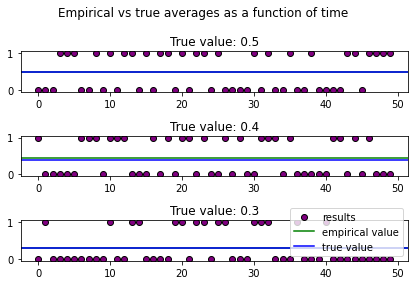

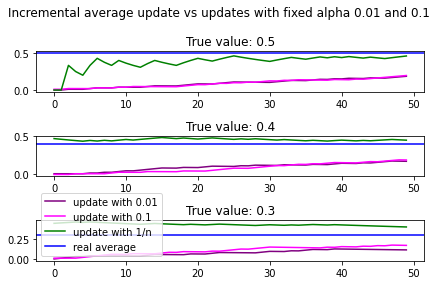

In [68]:
from matplotlib import pyplot

xaxis = []
delta = 0.1
pk = [0.5, 0.5-delta, 0.5-2*delta]
for i in range(50):
    xaxis.append(i)

samples = []
bandit = BernoulliBandit(pi=pk)
for i in range(3):
    p = []
    for j in range(50):
        sample = bandit.sample(i)
        p.append(sample)
    samples.append(p)
print(samples)

means  = []

for sample in samples:
    means.append(np.mean(sample))

labels= ["true value", "empirical value", "results"]

fig, subfigs = pyplot.subplots(3, 1, tight_layout=True)
for i in range(len(subfigs)):
    subfigs[i].scatter(xaxis, samples[i], edgecolors='black', c='purple', label=labels[2])
    subfigs[i].axhline(y=means[i], color='green', label=labels[1])
    subfigs[i].axhline(y=pk[i],color='blue', label=labels[0])
    subfigs[i].set_title("True value: " + str(pk[i]))
pyplot.legend()
figu = pyplot.gcf()
figu.suptitle("Empirical vs true averages as a function of time")
pyplot.show()


alphas  = [0.01, 0.1]
averages_1 = []
averages_2 = []
avgupd1 = []
for i in range(3):
    p1 = []
    pi_upd = []
    old_est = 0
    for j in range(50):
        sample = bandit.sample(i)
        old_est = bandit.update(alphas[0], sample, old_est)
        avgseen = bandit.updateAvg(sample)
        p1.append(old_est)
        pi_upd.append(avgseen)
    averages_1.append(p1)
    avgupd1.append(pi_upd)

bandit.clear()

for i in range(3):
    p2 = []
    old_est = 0
    for j in range(50):
        sample = bandit.sample(i)
        old_est = bandit.update(alphas[0], sample, old_est)
        p2.append(old_est)
    averages_2.append(p2)

bandit.clear()

###Q2###


labels = ["real average", "update with 0.1", "update with 0.01", "update with 1/n"]

fig, subfigs = pyplot.subplots(3, 1, tight_layout=True)
for i in range(len(subfigs)):
    subfigs[i].plot(xaxis, averages_1[i], c='purple', label=labels[2])
    subfigs[i].plot(xaxis, averages_2[i], c='magenta', label=labels[1])
    subfigs[i].plot(xaxis, avgupd1[i], c='green', label=labels[3])
    subfigs[i].axhline(y=pk[i], color='blue', label=labels[0])
    subfigs[i].set_title("True value: " + str(pk[i]))
pyplot.legend()
figu = pyplot.gcf()
figu.suptitle("Incremental average update vs updates with fixed alpha 0.01 and 0.1")
pyplot.show()

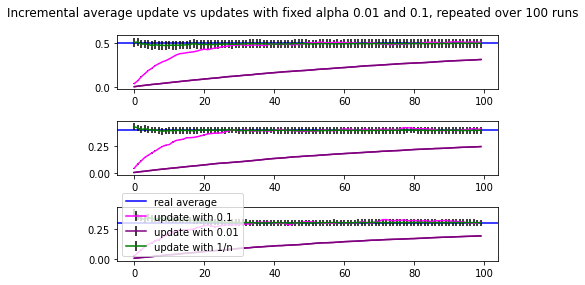

In [69]:

runs_1 = []
runs_2 = []
runs_3 = []

bandit1 = BernoulliBandit(pk)
bandit2 = BernoulliBandit(pk)
bandit3 = BernoulliBandit(pk)

for i in range(3):
    averages1 = []
    averages2 = []
    averages3 = []
    for j in range(100):
        bandit1.clear()
        bandit2.clear()
        bandit3.clear()
        means1 = []
        means2 = []
        means3 = []
        old_est1 = 0
        old_est2 = 0
        old_est3 = 0
        for k in range(100):
            sample1 = bandit1.sample(i)
            sample2 = bandit2.sample(i)
            old_est1 = bandit1.update(alphas[0], sample1, old_est1)
            means1.append(old_est1)
            old_est2 = bandit2.update(alphas[1], sample2, old_est2)
            means2.append(old_est2)
            sample3 = bandit3.sample(i)
            old_est3 = bandit3.updateAvg(sample3)
            means3.append(old_est3)
        averages1.append(means1)
        averages2.append(means2)
        averages3.append(means3)

    means_per_timestamp1 = []
    means_per_timestamp2 = []
    means_per_timestamp3 = []
    std_errors1 = []
    std_errors2 = []
    std_errors3 = []
    for p in range(100):
        std_errors1.append([])
        std_errors2.append([])
        std_errors3.append([])
    for j in range(100):
        mean1 = 0
        mean2 = 0
        mean3 = 0
        for k in range(100):
            mean1 += averages1[k][j]
            mean2 += averages2[k][j]
            mean3 += averages3[k][j]
            std_errors1[j].append(averages1[k][j])
            std_errors2[j].append(averages2[k][j])
            std_errors3[j].append(averages3[k][j])
        mean1 = mean1 / 100
        mean2 = mean2 / 100
        mean3 = mean3 / 100
        err1 = sem(std_errors1[j])
        std_errors1[j] = err1
        err2 = sem(std_errors2[j])
        std_errors2[j] = err2
        err3 = sem(std_errors3[j])
        std_errors3[j] = err3
        means_per_timestamp1.append(mean1)
        means_per_timestamp2.append(mean2)
        means_per_timestamp3.append(mean3)
    runs_1.append(means_per_timestamp1)
    runs_2.append(means_per_timestamp2)
    runs_3.append(means_per_timestamp3)

labels = ["real average", "update with 0.1", "update with 0.01", "update with 1/n"]

xaxis=np.arange(100)
fig, subfigs = pyplot.subplots(3, 1, tight_layout=True)
for i in range(len(subfigs)):
    subfigs[i].plot(xaxis, runs_1[i], c='purple')
    subfigs[i].axhline(y=pk[i], color='blue', label=labels[0])
    subfigs[i].errorbar(xaxis, runs_2[i], yerr=std_errors2[i], c='magenta', ecolor='black', label=labels[1])
    subfigs[i].errorbar(xaxis, runs_1[i], yerr=std_errors1[i], c='purple', ecolor='black', label=labels[2])
    subfigs[i].errorbar(xaxis, runs_3[i], yerr=std_errors3[i], c='green', ecolor='black', label=labels[3])
figu = pyplot.gcf()
figu.suptitle("Incremental average update vs updates with fixed alpha 0.01 and 0.1, repeated over 100 runs")
pyplot.legend()
pyplot.show()

Comment Q3: 

alpha=0.1 tends to reach the goal very quickly, while alpha=0.01 tends to increase more consistently but slower. 
The averaging option tends to be very close to the real average, which means it is a good estimation of the real average.

In [93]:
###Q4###

In [95]:
#Q4

class Epsilongreedy():
  def __init__(self,epsilon,counts,values):
    self.epsilon=epsilon
    self.values=values #avg reward for a specific arm
    self.counts=counts #number of pulls of each arm

  def initialize(self,n_arms):
    self.counts=[ 0 for col in range(n_arms)]
    self.values=[0 for col in range(n_arms)]
  
  
  def select_arm(self):
    if self.values[0] == self.values[1] == self.values[2]:
        return randrange(len(self.values))
    
    elif random() > self.epsilon: # Exploitation

      return np.argmax(self.values) 

    else:

      return randrange(len(self.values))
 
 ##Incremental update of the arm
  def updateAvg(self, chosen_arm, reward):
    self.counts[chosen_arm]=self.counts[chosen_arm]+1
    n=self.counts[chosen_arm]
    value= self.values[chosen_arm]
    new_value= (1/float(n))* reward   + ((n-1)/float(n)) * value 
    self.values[chosen_arm]=new_value 
##Update
  def update(self,chosen_arm,reward,alpha):
    self.counts[chosen_arm]=self.counts[chosen_arm]+1
    value= self.values[chosen_arm]
    new_value= value + alpha *(reward-value)   
    self.values[chosen_arm]=new_value 
      

  

In [96]:
class BernoulliArm():
    
  def __init__(self,p):
    self.p=p
      
  def sample(self,index):
    
    if random()>self.p[index]:
      return 0
    else:
      return 1
      
  def regret(self,index): 
    
    return np.max(self.p)- self.p[index]

In [97]:
def run_algorithm(algo,arms,num_runs, timesteps):


  
  N_Arms=3
  matrix_regret=np.zeros((100,1000))
  cumulative_rewards=[]
  A0=np.zeros((100,1000))
  avgreward_matrix=np.zeros((100,1000))
  Y=np.zeros((1000))
  for run in range(num_runs):
  
    algo.initialize((N_Arms))
    rewards=[]

    for t in range(timesteps):

      
      #choose an arm
      chosen_arm=algo.select_arm()
      #print('armchosen',chosen_arm)
      reward=arms.sample(chosen_arm)
      regret=arms.regret(chosen_arm)
      best_current_action=np.argmax(algo.values)
    
      if best_current_action==0:
        A0[run][t]=1
      #print('reg',regret)
      avgreward_matrix[run][t]=algo.values[chosen_arm]
      rewards.append(reward)     
      matrix_regret[run][t]=regret
      
      #A0[run-1][t-1]=chosen_arm
      cumulative_rewards=np.cumsum(rewards)  
      algo.updateAvg(chosen_arm,reward)
    
    Y=Y+np.array(cumulative_rewards)
  Y=Y/100  
  return A0,Y,matrix_regret,avgreward_matrix

In [98]:
delta=0.1
means=[0.5, 0.5 -delta, 0.5-2*delta] 

n_arms=len(means)
# Create list of Bernoulli Arms with Reward Information from list means
arms= BernoulliArm(means)

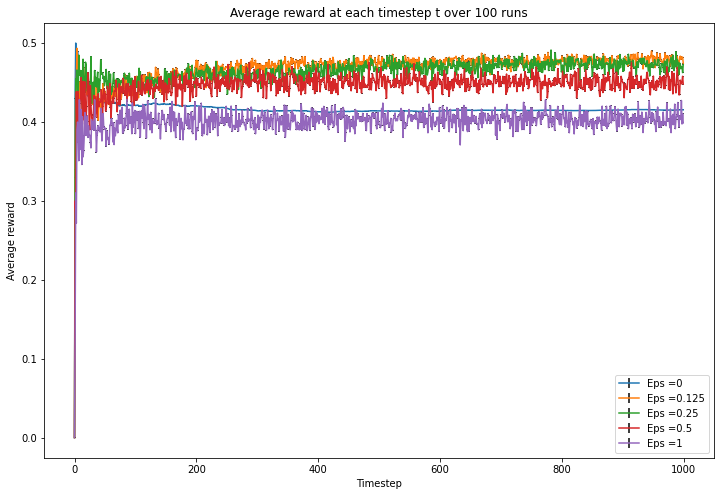

In [99]:

#Q4A

seed(1)
#pyplot.figure(figsize=(12,8))
for eps in [0,1/8,1/4,1/2,1]:
  Y=[]
  algo= Epsilongreedy(eps,[],[])
  algo.initialize(n_arms)
  x=np.arange(1000)
  results=run_algorithm(algo,arms,100,1000)
  avgreward_matrix=results[-1]
  for j in range(1000):
    a=np.mean(avgreward_matrix[:,j])
    Y.append(a)
  yerror = sem(Y)
  #pyplot.plot(x, Y, label = 'Eps ='+str(eps))
  pyplot.errorbar(x, Y,
            yerr=yerror, label= 'Eps ='+ str(eps),ecolor='black')
pyplot.legend()
pyplot.xlabel('Timestep')
pyplot.ylabel('Average reward')
pyplot.title('Average reward at each timestep t over 100 runs')
pyplot.show()

In [ ]:
###Q4B###

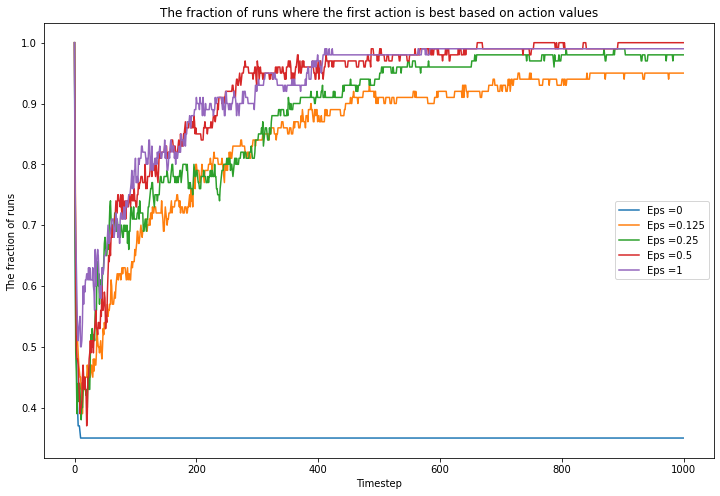

In [100]:
#pyplot.figure(figsize=(12,8))
seed(1)

for eps in [0,1/8,1/4, 1/2,1]:
  x=[]
  algo= Epsilongreedy(eps,[],[])
  algo.initialize(n_arms)
  results=run_algorithm(algo,arms,100,1000)
  for i in range(1000):

    l=results[0][:,i].tolist()
  
    m=l.count(1)
    
    x.append(m/100)
      


  pyplot.plot(x,label='Eps ='+str(eps))
  pyplot.xlabel('Timestep')
  pyplot.ylabel('The fraction of runs ')
  pyplot.title('The fraction of runs where the first action is best based on action values')
  pyplot.legend()
pyplot.show()  


In [ ]:
###Q4C###

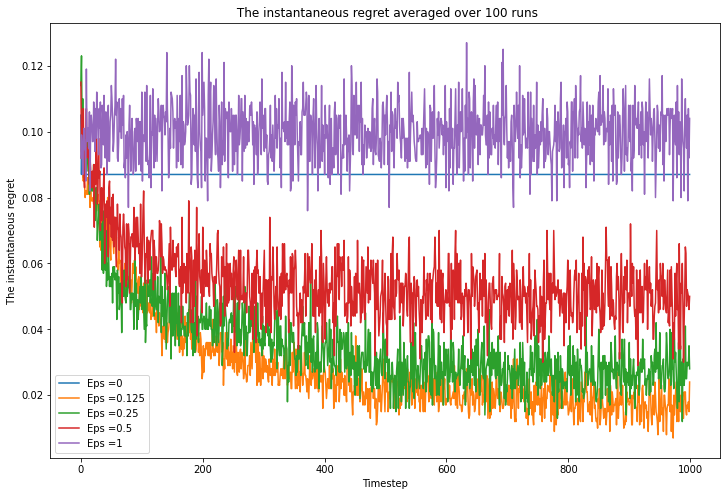

In [101]:
seed(1)
delta=0.1
means=[0.5, 0.5 -delta, 0.5-2*delta] 
# Create list of Bernoulli Arms with Reward Information from list means
arms= BernoulliArm(means)
#pyplot.figure(figsize=(12,8))
for eps in [0,1/8,1/4, 1/2,1]:
  reg=[]
  algo= Epsilongreedy(eps,[],[])
  algo.initialize(n_arms)
  #print(n_arms)
  results=run_algorithm(algo,arms,100,1000)
  Regret=results[2]


  for j in range(1000):
    reg.append(np.mean(Regret[:,j],axis=0))

  pyplot.plot(reg, label = 'Eps ='+str(eps))
  pyplot.legend()
  pyplot.xlabel('Timestep')
  pyplot.ylabel(' The instantaneous regret ')
  pyplot.title(' The instantaneous regret averaged over 100 runs')
pyplot.show()

In [ ]:
###Q4D###

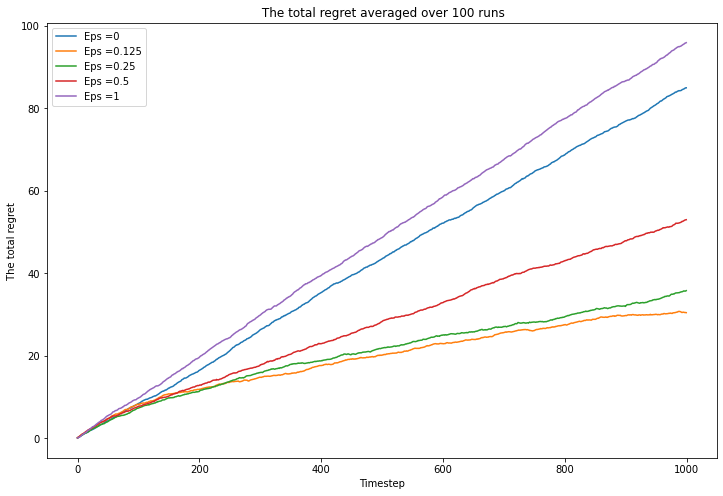

In [102]:
seed(1)
best_cumulative_rewards=[ i*0.5 for i in range(1,1001)]
#pyplot.figure(figsize=(12,8))
for eps in [0,1/8,1/4, 1/2,1]:
  tot_regret=[]
  algo= Epsilongreedy(eps,[],[])
  algo.initialize(n_arms)
  results=run_algorithm(algo,arms,100,1000) 
  Y=results[1]
  tot_regret=best_cumulative_rewards-Y
  pyplot.plot(tot_regret, label = 'Eps ='+str(eps))
pyplot.legend()
pyplot.xlabel('Timestep')
pyplot.ylabel(' The total regret ')
pyplot.title(' The total regret averaged over 100 runs')

pyplot.show()

Comment Q4:

As expected, we notice that the worst average reward and regret is for extreme values epsilon 0 and 1, with a higher average reward for epsilon 0 comparing to epsilon 1 since epsilon 0 is the case of always exploiting so the agent will not be able to see other options as the algorithm always chooses the action that is currently best whereas epsilon 1 is the case of exploration in which an action is always chosen at random so the agent will never use the past knowledge. Epsilon 0 in the fractions of runs of the first action learns fast and becomes flat at less than 40% which makes it the worst. 

Other epsilons 1/5, 1/4, and 1/8 curves, on the other hand, show a higher average reward at each timestep with the least regret over the course of 100 runs. The parameter epsilon 1/8 has the best average reward close to 0.5 and the lowest total regret with this incremental update. It is noteworthy that epsilon values closer to 0 have the best performance.

Q5

In [103]:
def run_algorithm2(algo,arms,num_runs, timesteps,alpha):
  
  N_Arms=3
  matrix_regret=np.zeros((100,1000))
  cumulative_rewards=[]
  A0=np.zeros((100,1000))
  avgreward_matrix=np.zeros((100,1000))
  
  Y=np.zeros((1000))
  for run in range(num_runs):
  
    algo.initialize((N_Arms))
    rewards=[]

    for t in range(timesteps):

      
      #choose an arm
      chosen_arm=algo.select_arm()
      #print('armchosen',chosen_arm)
      
      reward=arms.sample(chosen_arm)
      regret=arms.regret(chosen_arm)
      avgreward_matrix[run][t]=algo.values[chosen_arm]
      rewards.append(reward)     
      
      matrix_regret[run][t]=regret
      best_action=np.argmax(algo.values)
      if best_action==0:
        A0[run][t]=1
      
      cumulative_rewards=np.cumsum(rewards)  
      algo.update(chosen_arm,reward,alpha)  
    Y=Y+np.array(cumulative_rewards)
  Y=Y/100  
  return A0,Y,matrix_regret,avgreward_matrix

In [104]:
##Eps=1/8
delta=0.1
means=[0.5, 0.5 -delta, 0.5-2*delta] 
arms= BernoulliArm(means)
n_arms = len(means)
eps=1/8
algo.initialize(n_arms)

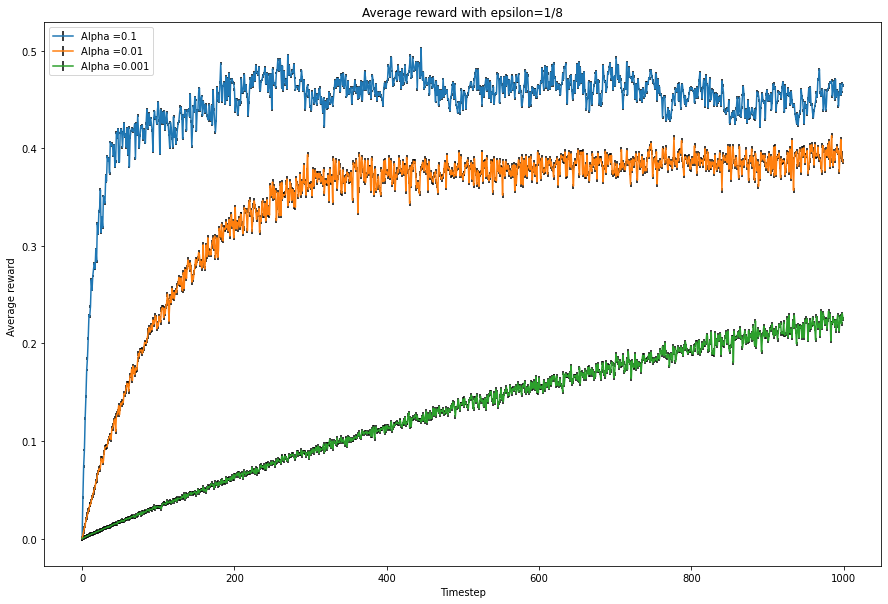

In [105]:
seed(1)
#pyplot.figure(figsize=((15,10)))

x=np.arange(1000)
for alpha in [0.1,0.01,0.001]:
  algo= Epsilongreedy(eps,[],[])
  Y=[]
  results=run_algorithm2(algo,arms,100,1000,alpha)
  avgreward_matrix=results[-1]
  for j in range(1000):
    a=np.mean(avgreward_matrix[:,j])
    Y.append(a)
  yerror=sem(Y)
  pyplot.errorbar(x, Y,
            yerr=yerror, label= 'Alpha ='+ str(alpha) , ecolor='black')  
  #plt.plot( Y,  label = 'Alpha ='+str(alpha))
  pyplot.legend()
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Average reward ')
  pyplot.title("Average reward with epsilon=1/8")
pyplot.show()  

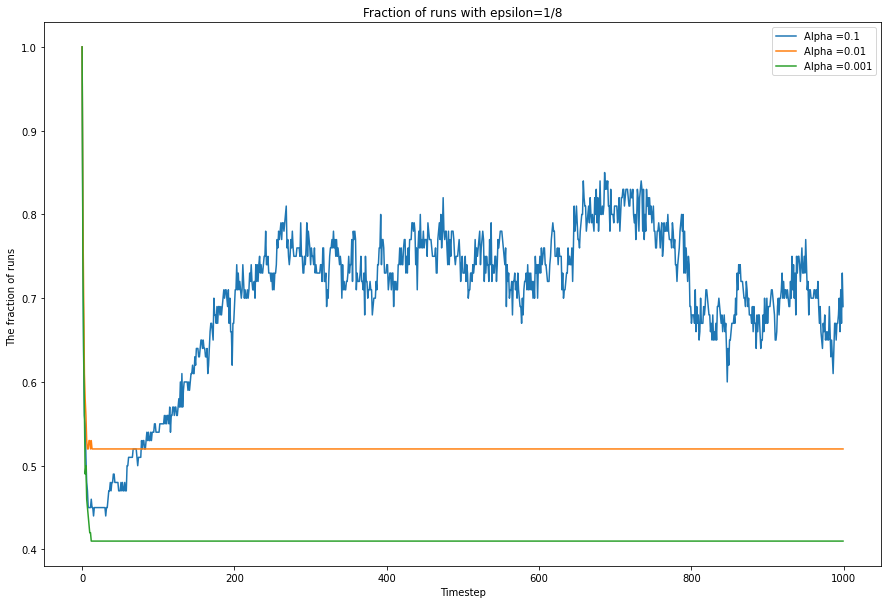

In [106]:
seed(1)
#pyplot.figure(figsize=(15,10))
for alpha in [0.1,0.01,0.001]:
  algo= Epsilongreedy(eps,[],[])
  results=run_algorithm2(algo,arms,100,1000,alpha)
  x=[]
  for i in range(1000):
    

    l=results[0][:,i].tolist()
  
    m=l.count(1)
    
    x.append(m/100)
      
  pyplot.plot(x,label='Alpha ='+str(alpha))
  pyplot.title("Fraction of runs with epsilon=1/8")

  pyplot.xlabel('Timestep')
  pyplot.ylabel('The fraction of runs ')

  pyplot.legend()
pyplot.show()

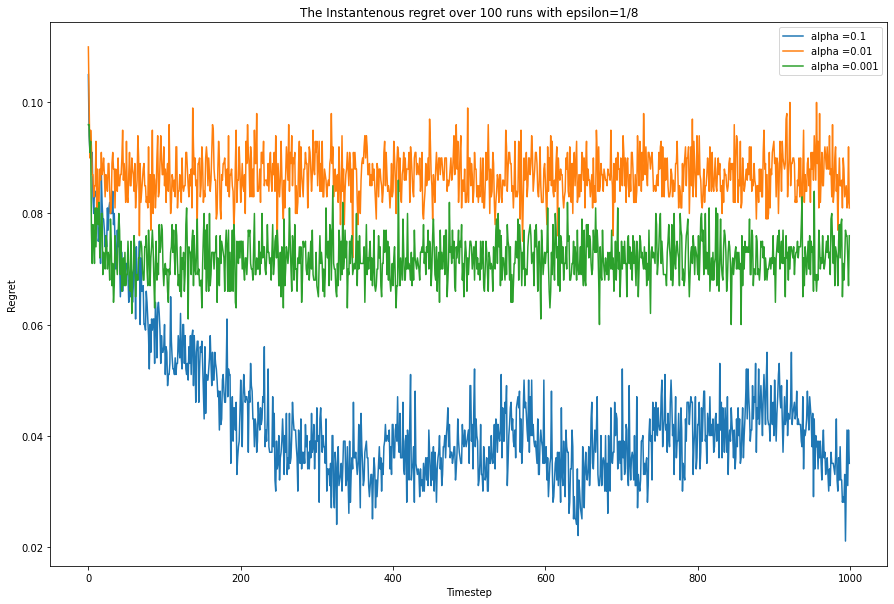

In [107]:
#pyplot.figure(figsize=(15,10))
seed(1)
for alpha in [0.1,0.01,0.001]:
  algo= Epsilongreedy(eps,[],[])
  reg=[]
  x=np.arange(1000)
  results=run_algorithm2(algo,arms,100,1000,alpha)
  Regret=results[2]
  #print(Regret)
  for j in range(1000):

    y=np.mean(Regret[:,j])

    reg.append(y)

  pyplot.plot(x,reg, label = 'alpha ='+str(alpha))
 
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Regret')
  pyplot.title('The Instantenous regret over 100 runs with epsilon=1/8')
  pyplot.legend()
pyplot.show()

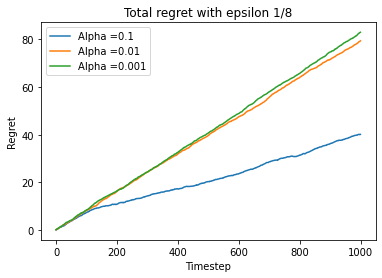

In [108]:
seed(1)   
for alpha in [0.1,0.01,0.001]:
  algo= Epsilongreedy(eps,[],[])
  reg=[]
  results=run_algorithm2(algo,arms,100,1000,alpha)
  tot_regret=[]
  
  Y=results[1]
  tot_regret=best_cumulative_rewards-Y
  pyplot.plot(tot_regret, label = 'Alpha ='+str(alpha))
  pyplot.title('Total regret with epsilon 1/8')
  pyplot.legend()
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Regret')
  pyplot.legend()
pyplot.show()
  

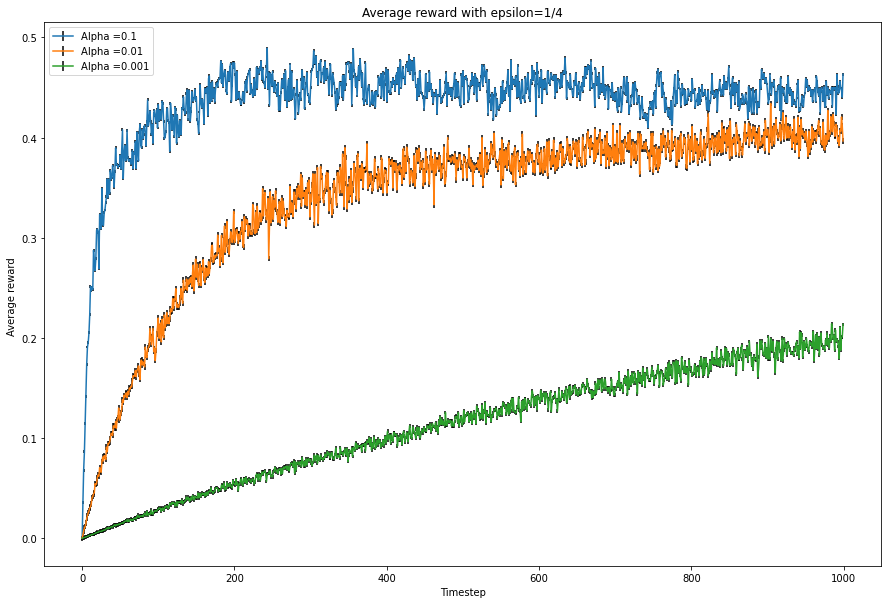

In [109]:
##Eps=1/4
seed(1)
eps=1/4
algo= Epsilongreedy(1/4,[],[])
algo.initialize(n_arms)

#pyplot.figure(figsize=((15,10)))

x=np.arange(1000)
for alpha in [0.1,0.01,0.001]:
  algo= Epsilongreedy(1/4,[],[])
  Y=[]
  results=run_algorithm2(algo,arms,100,1000,alpha)
  avgreward_matrix=results[-1]
  for j in range(1000):
    a=np.mean(avgreward_matrix[:,j])
    Y.append(a)
  yerror = sem(Y)
  pyplot.errorbar(x, Y,  label = 'Alpha ='+str(alpha), yerr=yerror, ecolor='black')
  pyplot.legend()
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Average reward ')
  pyplot.title("Average reward with epsilon=1/4")
pyplot.show()


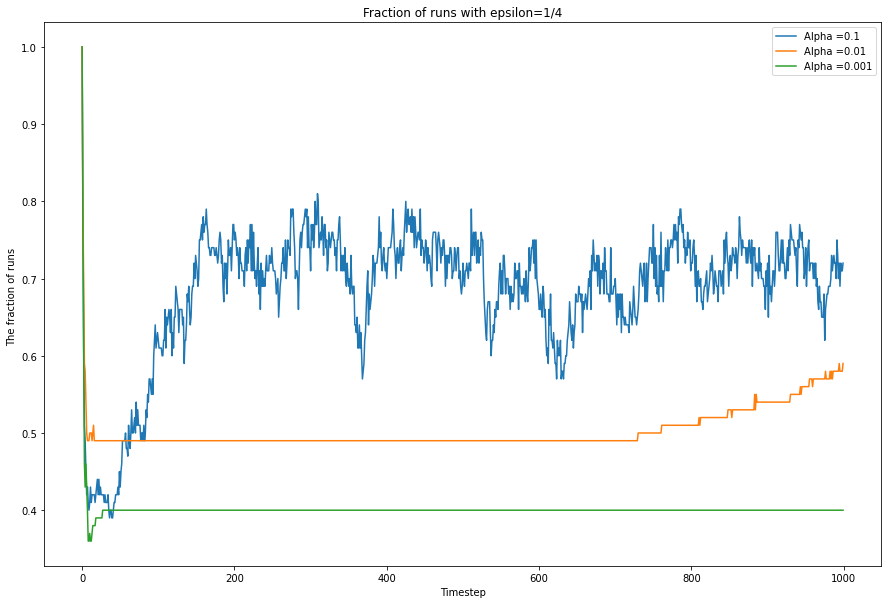

In [110]:
#pyplot.figure(figsize=(15,10))
seed(1)
for alpha in [0.1,0.01,0.001]:
  algo= Epsilongreedy(1/4,[],[])
  results=run_algorithm2(algo,arms,100,1000,alpha)
  x=[]
  for i in range(1000):
    l=results[0][:,i].tolist()
  
    m=l.count(1)
    
    x.append(m/100)

  pyplot.plot(x,label='Alpha ='+str(alpha))
  pyplot.title("Fraction of runs with epsilon=1/4")

  pyplot.xlabel('Timestep')
  pyplot.ylabel('The fraction of runs ')

  pyplot.legend()
pyplot.show()  

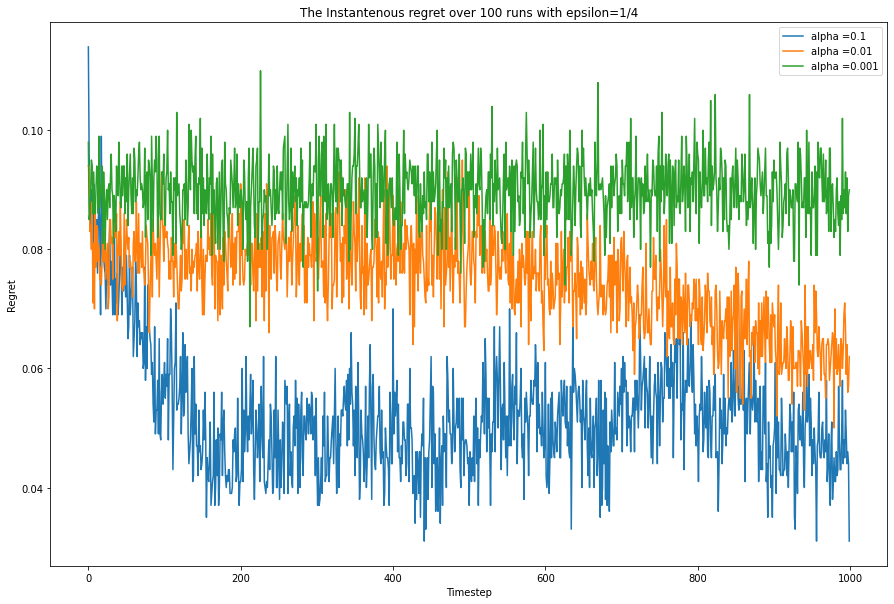

In [111]:
#pyplot.figure(figsize=(15,10))
seed(1)
for alpha in [0.1,0.01,0.001]:
  reg=[]
  algo= Epsilongreedy(1/4,[],[])
  x=np.arange(1000)
  results=run_algorithm2(algo,arms,100,1000,alpha)
  Regret=results[2]
  #print(Regret)
  for j in range(1000):

    y=np.mean(Regret[:,j])

    reg.append(y)

  pyplot.plot(x,reg, label = 'alpha ='+str(alpha))
 
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Regret')
  pyplot.title('The Instantenous regret over 100 runs with epsilon=1/4')
  pyplot.legend()
pyplot.show()  

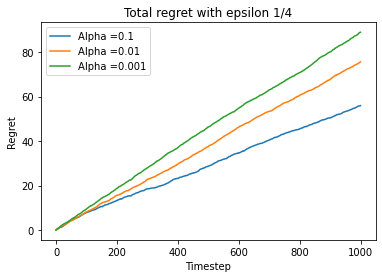

In [112]:
#seed(1)
for alpha in [0.1,0.01,0.001]:
  reg=[]
  algo= Epsilongreedy(1/4,[],[])
  results=run_algorithm2(algo,arms,100,1000,alpha)
  tot_regret=[]
  
  Y=results[1]
  tot_regret=best_cumulative_rewards-Y
  pyplot.plot(tot_regret, label = 'Alpha ='+str(alpha))
  pyplot.title('Total regret with epsilon 1/4')

  pyplot.xlabel('Timestep')
  pyplot.ylabel('Regret')
  pyplot.legend()
pyplot.show()

Comment Q5:

As previously discussed in Q4, the values of epsilon 1/8 and 1/4 produce the best results. Using the different values of the hyperparameter alpha, we can see that alpha=0.1 outperforms the two others alphas. It produces  the least total regret ,the highest average reward with a faster convergence after 100 timsteps and the highest fraction of runs of the first action.

In [23]:
#Q6

import math

import numpy as np
from matplotlib import pyplot
from scipy.stats import bernoulli


class UCBBandit:

    def __init__(self, pi):
        self.pi = pi
        self.samples = []
        self.timestamp = 0
        self.averageseen = 0
        self.dataseen=0
        self.old_estimate = np.zeros(3)
        self.c = 2
        self.times_per_action = np.zeros(3)

    def sample(self, index):
        x = bernoulli(self.pi[index])
        sample = x.rvs(1)
        return sample[0]

    def update(self, alpha, target, index):
        second_half = alpha * (target - self.old_estimate[index])
        self.old_estimate[index] = self.old_estimate[index] + second_half
        return self.old_estimate[index] + second_half

    def updateAvg(self, sample, index):
        self.dataseen = self.dataseen + 1
        second_half = (sample - self.averageseen) / self.dataseen
        self.averageseen = self.averageseen + second_half
        self.old_estimate[index] = self.averageseen
        return self.averageseen

    def clear(self):
        self.averageseen = 0
        self.timestamp = 0
        self.old_estimate = np.zeros(3)

    def choose_index(self):
        max = 0
        i_to_be_taken = 999
        for index in range(len(self.pi)):
            if self.times_per_action[index] != 0:
                num = (math.log(self.timestamp) / self.times_per_action[index])
                num = math.sqrt(num)
                num = num * self.c
                ucbtoal = self.old_estimate[index] + num
                if (ucbtoal > max):
                    max = ucbtoal
                    i_to_be_taken = index
        self.timestamp = self.timestamp + 1
        self.times_per_action[i_to_be_taken] = self.times_per_action[i_to_be_taken] + 1
        return i_to_be_taken

    def initialize(self, index):
        self.timestamp = self.timestamp + 1
        self.times_per_action[index] = self.times_per_action[index] + 1
        return self.sample(index)

    def regret(self, avg, index):
        return self.pi[0] - self.pi[index]
    
    def set_new_pk(self, delta):
        self.pi = [0.5, 0.5+delta, 0.5+2*delta]

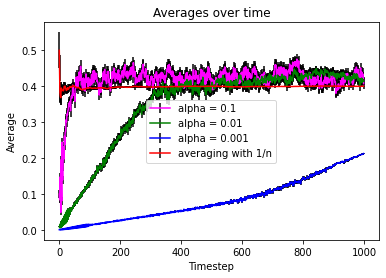

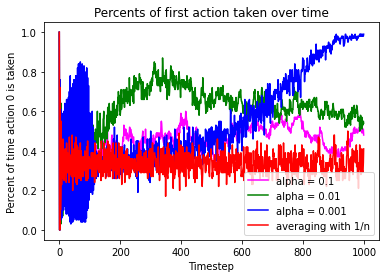

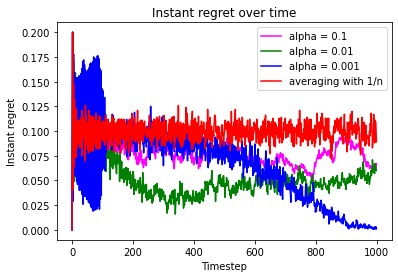

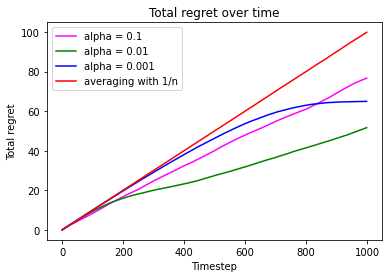

In [24]:
xaxis = []
seed(1)
for t in range(1000):
    xaxis.append(t)

alphas = [0.1, 0.01, 0.001]
pk = [0.5, 0.4, 0.3]
avgs = [[], [], []]
avgs[0] = np.zeros(1000)
avgs[1] = np.zeros(1000)
avgs[2] = np.zeros(1000)
percents = [[], [], []]
percents[0] = np.zeros(1000)
percents[1] = np.zeros(1000)
percents[2] = np.zeros(1000)
instant_regrets = [[], [], []]
instant_regrets[0] = np.zeros(1000)
instant_regrets[1] = np.zeros(1000)
instant_regrets[2] = np.zeros(1000)
total_regrets = [[], [], []]
total_regrets[0] = np.zeros(1000)
total_regrets[1] = np.zeros(1000)
total_regrets[2] = np.zeros(1000)
std_err = [[], [], []]
for i in range(1000):
    std_err[0].append([])
    std_err[1].append([])
    std_err[2].append([])

for alpha in range(3):
    for run in range(100):
        bandit = UCBBandit(pk)
        number_of_times_taken = np.zeros(3)
        for init_timestep in range(3):
            sample = bandit.initialize(init_timestep)
            avg = bandit.update(alphas[alpha], sample, init_timestep)
            avgs[alpha][init_timestep] = avgs[alpha][init_timestep] + avg
            number_of_times_taken[init_timestep] += 1
            regret = bandit.regret(avg, init_timestep)
            instant_regrets[alpha][init_timestep] = instant_regrets[alpha][init_timestep] + regret
            std_err[alpha][init_timestep].append(avg)
        percents[alpha][0] += 1
        for timestep in range(997):
            index = bandit.choose_index()
            sample = bandit.sample(index)
            avg = bandit.update(alphas[alpha], sample, index)
            avgs[alpha][timestep + 3] = avgs[alpha][timestep + 3] + avg
            number_of_times_taken[index] += 1
            if index == 0:
                percents[alpha][timestep + 3] = percents[alpha][timestep + 3] + 1
            regret = bandit.regret(avg, index)
            instant_regrets[alpha][timestep + 3] = instant_regrets[alpha][timestep + 3] + regret
            std_err[alpha][timestep+3].append(avg)

        total_regret = instant_regrets[alpha][0]
        total_regrets[alpha][0] = total_regret
        for regret in range(999):
            total_regret = total_regret + instant_regrets[alpha][regret + 1]
            total_regrets[alpha][regret + 1] = total_regret

    for average in range(1000):
        avgs[alpha][average] = avgs[alpha][average] / 100
        percents[alpha][average] = percents[alpha][average] / 100
        instant_regrets[alpha][average] = instant_regrets[alpha][average]/100
        total_regrets[alpha][average] = total_regrets[alpha][average]/100
        std_err[alpha][average] = sem(std_err[alpha][average])

labels = ['alpha = 0.1', 'alpha = 0.01', 'alpha = 0.001', 'averaging with 1/n']

avgs4 = np.zeros(1000)
percents4 = np.zeros(1000)
instant_regrets4 = np.zeros(1000)
total_regrets4 = np.zeros(1000)
std_err4 = []
for i in range(1000):
    std_err4.append([])

for run in range(100):
    bandit = UCBBandit(pk)
    number_of_times_taken = np.zeros(3)
    for init_timestep in range(3):
        sample = bandit.initialize(init_timestep)
        avg = bandit.updateAvg(sample, init_timestep)
        avgs4[init_timestep] = avgs4[init_timestep] + avg
        number_of_times_taken[init_timestep] += 1
        regret = bandit.regret(avg, init_timestep)
        instant_regrets4[init_timestep] = instant_regrets4[init_timestep] + regret
        std_err4[init_timestep].append(avg)
    percents4[0] += 1
    for timestep in range(997):
        index = bandit.choose_index()
        sample = bandit.sample(index)
        avg = bandit.updateAvg(sample, index)
        avgs4[timestep + 3] = avgs4[timestep + 3] + avg
        number_of_times_taken[index] += 1
        if index == 0:
            percents4[timestep + 3] = percents4[timestep + 3] + 1
        regret = bandit.regret(avg, index)
        instant_regrets4[timestep + 3] = instant_regrets4[timestep + 3] + regret
        std_err4[timestep+3].append(avg)

    total_regret = instant_regrets4[0]
    total_regrets4[0] = total_regret
    for regret in range(999):
        total_regret = total_regret + instant_regrets4[regret + 1]
        total_regrets4[regret + 1] = total_regret

for average in range(1000):
    avgs4[average] = avgs4[average] / 100
    percents4[average] = percents4[average] / 100
    instant_regrets4[average] = instant_regrets4[average]/100
    total_regrets4[average] = total_regrets4[average]/100
    std_err4[average] = sem(std_err4[average])




# PLOTTING AVERAGES OVER TIME #
#pyplot.plot(xaxis, avgs[0], c='magenta')
#pyplot.plot(xaxis, avgs[1], c='green')
#pyplot.plot(xaxis, avgs[2], c='blue')
pyplot.errorbar(xaxis, avgs[0], yerr=std_err[0], c='magenta', ecolor='black', label=labels[0])
pyplot.errorbar(xaxis, avgs[1], yerr=std_err[1], c='green', ecolor='black', label=labels[1])
pyplot.errorbar(xaxis, avgs[2], yerr=std_err[2], c='blue', ecolor='black', label=labels[2])
pyplot.errorbar(xaxis, avgs4, yerr=std_err4, c='red', ecolor='black', label=labels[3])
pyplot.title("Averages over time")
pyplot.ylabel("Average")
pyplot.xlabel("Timestep")
pyplot.legend()
pyplot.show()

# PLOTTING PERCENTS OF FIRST ACTION TAKEN OVER TIME #
pyplot.plot(xaxis, percents[0], c='magenta', label=labels[0])
pyplot.plot(xaxis, percents[1], c='green', label=labels[1])
pyplot.plot(xaxis, percents[2], c='blue', label=labels[2])
pyplot.plot(xaxis, percents4, c='red', label=labels[3])
pyplot.title("Percents of first action taken over time")
pyplot.legend()
pyplot.xlabel("Timestep")
pyplot.ylabel("Percent of time action 0 is taken")
pyplot.show()

# PLOTTING INSTANT REGRET OVER TIME #
pyplot.plot(xaxis, instant_regrets[0], c='magenta', label=labels[0])
pyplot.plot(xaxis, instant_regrets[1], c='green', label=labels[1])
pyplot.plot(xaxis, instant_regrets[2], c='blue', label=labels[2])
pyplot.plot(xaxis, instant_regrets4, c='red', label=labels[3])
pyplot.title("Instant regret over time")
pyplot.legend()
pyplot.xlabel("Timestep")
pyplot.ylabel("Instant regret")
pyplot.show()

# PLOTTING TOTAL REGRET OVER TIME #
pyplot.plot(xaxis, total_regrets[0], c='magenta', label=labels[0])
pyplot.plot(xaxis, total_regrets[1], c='green', label=labels[1])
pyplot.plot(xaxis, total_regrets[2], c='blue', label=labels[2])
pyplot.plot(xaxis, total_regrets4, c='red', label=labels[3])
pyplot.title("Total regret over time")
pyplot.legend()
pyplot.xlabel("Timestep")
pyplot.ylabel("Total regret")
pyplot.show()

COMMENT Q6:

Here we can see that the learning rate alpha=0.001 makes the algorithm learn much slower, but its total regret tapers off toward t=800 indicating that the regret decreases over time.The best parameter would be alpha=0.1 because it offers the best compromise
between a fast learning rate and a minimale total.

In [38]:
import numpy as np
from matplotlib import pyplot
from numpy.random import beta
from scipy.stats import bernoulli


class ThompsonBandit:

    def __init__(self, pi):
        self.pi = pi
        self.samples = []
        self.timestamp = 0
        self.averageseen = 0
        self.old_estimate = np.zeros(3)
        self.c = 2
        self.times_per_action = np.zeros(3)
        self.successes = [1, 1, 1]
        self.failures = [1, 1, 1]

    def sample(self, index):
        x = bernoulli(self.pi[index])
        sample = x.rvs(1)
        return sample[0]

    def update(self, alpha, target, index):
        second_half = alpha * (target - self.old_estimate[index])
        self.old_estimate[index] = self.old_estimate[index] + second_half
        return self.old_estimate[index] + second_half

    def updateAvg(self, sample, index):
        if self.averageseen == 0:
            self.averageseen = sample
        else:
            self.averageseen = ((self.averageseen * self.timestamp) + sample) / (self.timestamp + 1)
            self.timestamp = self.timestamp + 1
        self.old_estimate[index] = self.averageseen
        return self.averageseen

    def clear(self):
        self.averageseen = 0
        self.timestamp = 0
        self.old_estimate = np.zeros(3)

    def choose_index(self):
        index_chosen = 999
        prob1 = beta(self.successes[0], self.failures[0])
        prob2 = beta(self.successes[1], self.failures[1])
        prob3 = beta(self.successes[2], self.failures[2])
        if prob1 > prob2 and prob1 > prob3:
            index_chosen = 0
        elif prob2 > prob1 and prob2 > prob3:
            index_chosen = 1
        else:
            index_chosen = 2
        return index_chosen

    def update_beta(self, index, sample):
        if sample == 1:
            self.successes[index] += 1
        elif sample == 0:
            self.failures[index] += 1

    def regret(self, avg, index):
        return self.pi[0] - self.pi[index]
    
    def set_new_pk(self, delta):
        self.pi = [0.5, 0.5+delta, 0.5+2*delta]

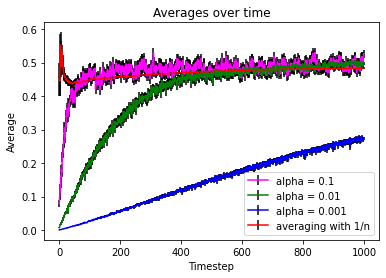

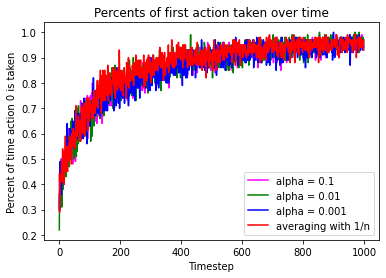

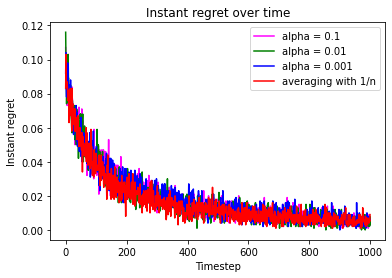

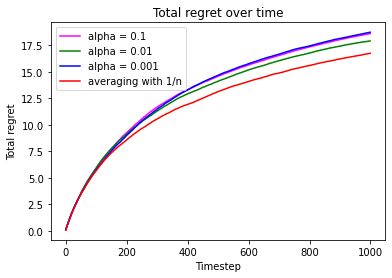

In [42]:
xaxis = []
for t in range(1000):
    xaxis.append(t)

alphas = [0.1, 0.01, 0.001]
pk = [0.5, 0.4, 0.3]
avgs = [[], [], []]
avgs[0] = np.zeros(1000)
avgs[1] = np.zeros(1000)
avgs[2] = np.zeros(1000)
percents = [[], [], []]
percents[0] = np.zeros(1000)
percents[1] = np.zeros(1000)
percents[2] = np.zeros(1000)
instant_regrets = [[], [], []]
instant_regrets[0] = np.zeros(1000)
instant_regrets[1] = np.zeros(1000)
instant_regrets[2] = np.zeros(1000)
total_regrets = [[], [], []]
total_regrets[0] = np.zeros(1000)
total_regrets[1] = np.zeros(1000)
total_regrets[2] = np.zeros(1000)
std_err = [[], [], []]
for i in range(1000):
    std_err[0].append([])
    std_err[1].append([])
    std_err[2].append([])

for alpha in range(3):
    for run in range(100):
        bandit = ThompsonBandit(pk)
        number_of_times_taken = np.zeros(3)
        for timestep in range(1000):
            index = bandit.choose_index()
            sample = bandit.sample(index)
            bandit.update_beta(index, sample)
            avg = bandit.update(alphas[alpha], sample, index)
            avgs[alpha][timestep] = avgs[alpha][timestep] + avg
            number_of_times_taken[index] += 1
            if index == 0:
                percents[alpha][timestep] = percents[alpha][timestep] + 1
            regret = bandit.regret(avg, index)
            instant_regrets[alpha][timestep] = instant_regrets[alpha][timestep] + regret
            std_err[alpha][timestep].append(avg)

        total_regret = instant_regrets[alpha][0]
        total_regrets[alpha][0] = total_regret
        for regret in range(999):
            total_regret = total_regret + instant_regrets[alpha][regret + 1]
            total_regrets[alpha][regret+1] = total_regret


    for average in range(1000):
        avgs[alpha][average] = avgs[alpha][average] / 100
        percents[alpha][average] = percents[alpha][average] / 100
        instant_regrets[alpha][average] = instant_regrets[alpha][average]/100
        total_regrets[alpha][average] = total_regrets[alpha][average]/100
        std_err[alpha][average] = sem(std_err[alpha][average])

avgs4 = np.zeros(1000)
percents4 = np.zeros(1000)
instant_regrets4 = np.zeros(1000)
total_regrets4 = np.zeros(1000)
std_err4 = []
for i in range(1000):
    std_err4.append([])

for run in range(100):
    bandit = ThompsonBandit(pk)
    number_of_times_taken = np.zeros(3)
    for timestep in range(1000):
        index = bandit.choose_index()
        sample = bandit.sample(index)
        bandit.update_beta(index, sample)
        avg = bandit.updateAvg(sample, index)
        avgs4[timestep] = avgs4[timestep] + avg
        number_of_times_taken[index] += 1
        if index == 0:
            percents4[timestep] = percents4[timestep] + 1
        regret = bandit.regret(avg, index)
        instant_regrets4[timestep] = instant_regrets4[timestep] + regret
        std_err4[timestep].append(avg)

    total_regret = instant_regrets4[0]
    total_regrets4[0] = total_regret
    for regret in range(999):
        total_regret = total_regret + instant_regrets4[regret + 1]
        total_regrets4[regret + 1] = total_regret

for average in range(1000):
    avgs4[average] = avgs4[average] / 100
    percents4[average] = percents4[average] / 100
    instant_regrets4[average] = instant_regrets4[average]/100
    total_regrets4[average] = total_regrets4[average]/100
    std_err4[average] = sem(std_err4[average])


labels = ['alpha = 0.1', 'alpha = 0.01', 'alpha = 0.001', 'averaging with 1/n']





# PLOTTING AVERAGES OVER TIME #
# PLOTTING AVERAGES OVER TIME #
#pyplot.plot(xaxis, avgs[0], c='magenta')
#pyplot.plot(xaxis, avgs[1], c='green')
#pyplot.plot(xaxis, avgs[2], c='blue')
pyplot.errorbar(xaxis, avgs[0], yerr=std_err[0], c='magenta', ecolor='black', label=labels[0])
pyplot.errorbar(xaxis, avgs[1], yerr=std_err[1], c='green', ecolor='black', label=labels[1])
pyplot.errorbar(xaxis, avgs[2], yerr=std_err[2], c='blue', ecolor='black', label=labels[2])
pyplot.errorbar(xaxis, avgs4, yerr=std_err4, c='red', ecolor='black', label=labels[3])
pyplot.title("Averages over time")
pyplot.ylabel("Average")
pyplot.xlabel("Timestep")
pyplot.legend()
pyplot.show()

# PLOTTING PERCENTS OF FIRST ACTION TAKEN OVER TIME #
pyplot.plot(xaxis, percents[0], c='magenta', label=labels[0])
pyplot.plot(xaxis, percents[1], c='green', label=labels[1])
pyplot.plot(xaxis, percents[2], c='blue', label=labels[2])
pyplot.plot(xaxis, percents4, c='red', label=labels[3])
pyplot.title("Percents of first action taken over time")
pyplot.legend()
pyplot.xlabel("Timestep")
pyplot.ylabel("Percent of time action 0 is taken")
pyplot.show()

# PLOTTING INSTANT REGRET OVER TIME #
pyplot.plot(xaxis, instant_regrets[0], c='magenta', label=labels[0])
pyplot.plot(xaxis, instant_regrets[1], c='green', label=labels[1])
pyplot.plot(xaxis, instant_regrets[2], c='blue', label=labels[2])
pyplot.plot(xaxis, instant_regrets4, c='red', label=labels[3])
pyplot.title("Instant regret over time")
pyplot.legend()
pyplot.xlabel("Timestep")
pyplot.ylabel("Instant regret")
pyplot.show()

# PLOTTING TOTAL REGRET OVER TIME #
pyplot.plot(xaxis, total_regrets[0], c='magenta', label=labels[0])
pyplot.plot(xaxis, total_regrets[1], c='green', label=labels[1])
pyplot.plot(xaxis, total_regrets[2], c='blue', label=labels[2])
pyplot.plot(xaxis, total_regrets4, c='red', label=labels[3])
pyplot.title("Total regret over time")
pyplot.legend()
pyplot.xlabel("Timestep")
pyplot.ylabel("Total regret")
pyplot.show()

In [78]:
##Thompson sampling: We see that thompson sampling is an effective algorithm for getting the maximum reward while avoiding a large regret.
#Indeed, the total regret plateaus as the intant regret approaches 0. The most optimal value of alpha is 0.1, as it presents the best
#compromise between the maximum value obtained and the minimum total regret.

In [ ]:
##Q8:

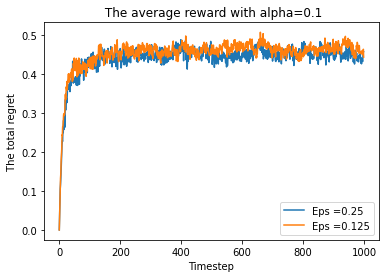

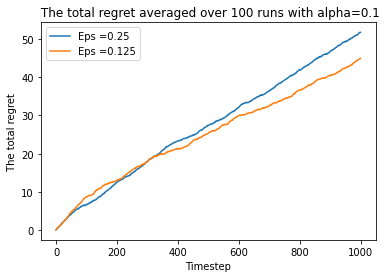

In [62]:
#pyplot.figure(figsize=((15,10)))

x=np.arange(1000)
for eps in [1/4,1/8]:
  Y=[]
  algo= Epsilongreedy(eps,[],[])
  algo.initialize(n_arms)
  results=run_algorithm2(algo,arms,100,1000,0.1)
  avgreward_matrix=results[-1]
  for j in range(1000):
    a=np.mean(avgreward_matrix[:,j])
    Y.append(a)
  pyplot.plot( Y,  label = 'Eps ='+str(eps))
  pyplot.xlabel('Timestep')
  pyplot.legend()
  pyplot.ylabel(' The total regret ')
  pyplot.title(' The average reward with alpha=0.1')
  
pyplot.show()

best_cumulative_rewards=[ i*0.5 for i in range(1,1001)]

for eps in [1/4,1/8]:
  tot_regret=[]
  algo= Epsilongreedy(eps,[],[])
  algo.initialize(n_arms)
  results=run_algorithm2(algo,arms,100,1000,0.1) 
  Y=results[1]
  tot_regret=best_cumulative_rewards-Y
  pyplot.plot(tot_regret, label = 'Eps ='+str(eps))
  pyplot.legend()
  pyplot.xlabel('Timestep')
  pyplot.ylabel(' The total regret ')
  pyplot.title(' The total regret averaged over 100 runs with alpha=0.1')
pyplot.show()

COMMENT Q8: 

According to q5, alpha=0.1 turned out to be the best hyperparameter for both epsilons 1/4 and 1/8. 
For that, to choose the best couple of hyperparameters for epsilon greedy algorithm we need to compare the behavior of both epsilons with alpha=0.1. 
Since they both have similar performance in the average reward, we opted to check the performance of the total regret. The best parameter would be epsilon=1/8 because it offers a better performance in terms of a minimal total regret.

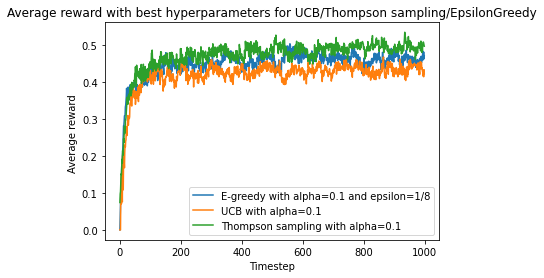

In [65]:
##Q8:
#pyplot.figure(figsize=((15,10)))

x=np.arange(1000)
for eps in [1/8]:
  Y=[]
  algo= Epsilongreedy(eps,[],[])
  algo.initialize(n_arms)
  results=run_algorithm2(algo,arms,100,1000,0.1)
  avgreward_matrix=results[-1]
  for j in range(1000):
    a=np.mean(avgreward_matrix[:,j])
    Y.append(a)
  


avgs = np.zeros(1000)
avgs2 = np.zeros(1000)

for run in range(100):
    bandit = UCBBandit(pk)
    number_of_times_taken = np.zeros(3)
    for init_timestep in range(3):
        sample = bandit.initialize(init_timestep)
        avg = bandit.update(0.01, sample, init_timestep)
        avgs4[init_timestep] = avgs4[init_timestep] + avg
    for timestep in range(997):
        index = bandit.choose_index()
        sample = bandit.sample(index)
        avg = bandit.update(0.1, sample, index)
        avgs[timestep + 3] = avgs[timestep + 3] + avg

for average in range(1000):
    avgs[average] = avgs[average] / 100

for run in range(100):
    bandit = ThompsonBandit(pk)
    number_of_times_taken = np.zeros(3)
    for timestep in range(1000):
        index = bandit.choose_index()
        sample = bandit.sample(index)
        bandit.update_beta(index, sample)
        avg = bandit.update(0.1, sample, index)
        avgs2[timestep] = avgs2[timestep] + avg
        number_of_times_taken[index] += 1

for average in range(1000):
    avgs2[average] = avgs2[average] / 100

labels = ["UCB with alpha=0.1", "Thompson sampling with alpha=0.1", "E-greedy with alpha=0.1 and epsilon=1/8"]

pyplot.plot( Y,  label=labels[2])
pyplot.plot( avgs,  label = labels[0])
pyplot.plot( avgs2,  label = labels[1])
pyplot.legend()
pyplot.xlabel('Timestep')
pyplot.ylabel('Average reward ')
pyplot.title("Average reward with best hyperparameters for UCB/Thompson sampling/EpsilonGreedy")  

pyplot.show()

The reasons behind choosing these hyperparameters for epsilon greedy, UCB and thompson sampling as best are detailed above.

We notice that Thompson sampling has the fastest convergence and the highest average reward close to 0.5.


In [81]:
#Q9


##Q9
## Non stationary problem
means=[0.5,0.5-delta,0.5-2*delta]
arms= BernoulliArm(means)

delta1=0.1
new_means=[0.5,0.5+delta,0.5+2*delta]
alpha=0.1
n_arms=len(new_means)

def run_algorithm3(algo,arms,num_runs, timesteps,alpha):


  
  N_Arms=3
 
  avgreward_matrix=np.zeros((100,1000))
 
  for run in range(num_runs):
  
    algo.initialize((N_Arms))
    arms=BernoulliArm(means)

    for t in range(timesteps):
      if(t==500):
        arms= BernoulliArm(new_means)


      
      #choose an arm
      chosen_arm=algo.select_arm()
     
      reward=arms.sample(chosen_arm)
     
      avgreward_matrix[run][t]=algo.values[chosen_arm]
          
        
      algo.update(chosen_arm,reward,alpha)
    
  return avgreward_matrix

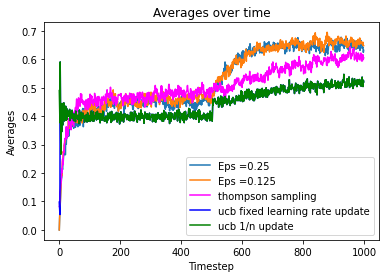

In [94]:

xaxis = []
for i in range(1000):
    xaxis.append(i)

alpha = 0.1
delta= 0.1
pk = [0.5, 0.5-delta, 0.5-2*delta]
avgs = np.zeros(1000)
for run in range(100):
    bandit = ThompsonBandit(pk)
    number_of_times_taken = np.zeros(3)
    for timestep in range(1000):
        if (timestep ==500):
            bandit.set_new_pk(delta)
       

        index = bandit.choose_index()
        sample = bandit.sample(index)
        bandit.update_beta(index, sample)
        avg = bandit.update(alpha, sample, index)
        avgs[timestep] = avgs[timestep] + avg
        number_of_times_taken[index] += 1

for average in range(1000):
    avgs[average] = avgs[average] / 100


avgs2 = np.zeros(1000)
avgs3 = np.zeros(1000)
for run in range(100):
    bandit = UCBBandit(pk)
    bandit2 = UCBBandit(pk)
    number_of_times_taken = np.zeros(3)
    for init_timestep in range(3):
        sample = bandit.initialize(init_timestep)
        avg = bandit.update(alpha, sample, init_timestep)
        avg2 = bandit.updateAvg(sample, init_timestep)
        avgs2[init_timestep] = avgs2[init_timestep] + avg
        avgs3[init_timestep] = avgs3[init_timestep] + avg2
        number_of_times_taken[init_timestep] += 1
    for timestep in range(997):
        if (timestep==500):
            bandit.set_new_pk(delta)
        index = bandit.choose_index()
        sample = bandit.sample(index)
        avg = bandit.update(alpha, sample, index)
        avgs2[timestep + 3] = avgs2[timestep + 3] + avg
        avg2 = bandit.updateAvg(sample, index)
        avgs3[timestep+3] = avgs3[timestep + 3] + avg
        number_of_times_taken[index] += 1

for average in range(1000):
    avgs2[average] = avgs2[average] / 100
    avgs3[average] = avgs3[average] / 100

x=np.arange(1000)
for eps in [1/4,1/8]:
  algo= Epsilongreedy(eps,[],[])
  algo.initialize(n_arms)
  Y=[]
  avgreward_matrix=run_algorithm3(algo,arms,100,1000,alpha)
  
  for j in range(1000):
    a=np.mean(avgreward_matrix[:,j])
    Y.append(a)
  pyplot.plot( Y,  label = 'Eps ='+str(eps))

labels = ['thompson sampling', 'ucb 1/n update', 'ucb fixed learning rate update']

#pyplot.figure(figsize=((15,10)))


# PLOTTING AVERAGES OVER TIME #
pyplot.plot(xaxis, avgs, c='magenta', label=labels[0])
pyplot.plot(xaxis, avgs2, c='blue', label=labels[2])
pyplot.plot(xaxis, avgs3, c='green', label=labels[1])
pyplot.title("Averages over time")
pyplot.legend()
pyplot.xlabel("Timestep")
pyplot.ylabel("Averages")
pyplot.show()

Comment q9: 

After 500 timesteps, we notice a sudden increase in the behavior of the three algorithms due to the introduction of non stationarity. UCB and Thompson sampling have similar behavior however thompson sampling has better average reward.
It seems that Epsilon greedy and thompson sampling are the best algorithm to cope with non stationarity. 

# Sheet 2